## Final Project Submission

Please fill out:
* Student name: Fahmi Afri
* Student pace: art time 
* Scheduled project review date/time: 30/10/2022
* Instructor name: Hardik Idnani
* Blog post URL:https://github.com/fhmiafri/dsc-phase-2-project


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler,PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression
%matplotlib inline
from statsmodels.formula.api import ols

In [2]:
data=pd.read_csv(r'C:\Users\fahmi\Downloads\kc_house_data.csv')

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

1.    ID - Identification Number
2.  Date - Date sold
3. price - Sale price
4. bedrooms - number of bedrooms
5. bathrooms - No of Bathrooms. 0.25 - Only Toilet 0.50 - Toilet and Sink 0.75 - Toilet, Sink and Shower 1 - Toilet, Sink, Shower and Bathtub
6.  sqft_liv - Total living/built up area in square feet.
7.  sqft_lot - Total lot area(includes living area and other structures such as garages, swimming pools, and sheds) in square feet.
8.  floors - Number of floors.
9. waterfront - '1' if the property has a waterfront, 'O' if not.
10. view - how good the view of the property on a index of (0 - min - 4 - max)
11. condition - Condition of the house, ranked from 1 to 5(1 min , 5 - max)
12. grade - classification of house based on the quality of construction and materials used measured on a index of(1-13)
13. sqft_above - area above the basemeant in square feet.
14. sqft basmt - area below the basemeant in square feet.
15. yr_built - year built
16. yr renov - year renovated (if never renovated it's zero)
17. zipcode - Zipcode of the house
18. lat - Latitude of the house.
19. long - longitude of the house
20. squft_liv15 - avearge of the living area of nearest 15 houses in square feet
21. squft lot15 - avearge of the lot area of nearest 15 houses in square feetID - Identification Number


In [5]:
#selecting only the importants
data2 = data [['price', 'bedrooms','bathrooms','sqft_living','sqft_lot','floors','condition', 'grade' ]]

In [6]:
data2

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade
0,221900.0,3,1.00,1180,5650,1.0,3,7
1,538000.0,3,2.25,2570,7242,2.0,3,7
2,180000.0,2,1.00,770,10000,1.0,3,6
3,604000.0,4,3.00,1960,5000,1.0,5,7
4,510000.0,3,2.00,1680,8080,1.0,3,8
...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,3,8
21593,400000.0,4,2.50,2310,5813,2.0,3,8
21594,402101.0,2,0.75,1020,1350,2.0,3,7
21595,400000.0,3,2.50,1600,2388,2.0,3,8


In [7]:
data2.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,3.409825,7.657915
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.650546,1.173200
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,1.000000,3.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,3.000000,7.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,3.000000,7.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,4.000000,8.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,5.000000,13.000000


In [8]:
#making sure they are not in scientific notation
pd.options.display.float_format = lambda x : '{:.0f}'.format(x) if int(x) == x else '{:,.2f}'.format(x)

In [9]:
#checking for missing values
data2.isnull().sum()

price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
condition      0
grade          0
dtype: int64

In [10]:
data2.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade
count,21597,21597,21597,21597,21597,21597,21597,21597
mean,"540,296.57",3.37,2.12,"2,080.32","15,099.41",1.49,3.41,7.66
std,"367,368.14",0.93,0.77,918.11,"41,412.64",0.54,0.65,1.17
min,78000,1,0.50,370,520,1,1,3
25%,322000,3,1.75,1430,5040,1,3,7
50%,450000,3,2.25,1910,7618,1.50,3,7
75%,645000,4,2.50,2550,10685,2,4,8
max,7700000,33,8,13540,1651359,3.50,5,13


In [11]:
#sorting according to prices
data2.sort_values('price')

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade
15279,78000,2,1,780,16344,1,1,5
465,80000,1,0.75,430,5050,1,2,4
16184,81000,2,1,730,9975,1,1,5
8267,82000,3,1,860,10426,1,3,6
2139,82500,2,1,520,22334,1,2,5
...,...,...,...,...,...,...,...,...
1446,5350000,5,5,8000,23985,2,3,12
4407,5570000,5,5.75,9200,35069,2,3,13
9245,6890000,6,7.75,9890,31374,2,3,13
3910,7060000,5,4.50,10040,37325,2,3,11


C:\Users\fahmi\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

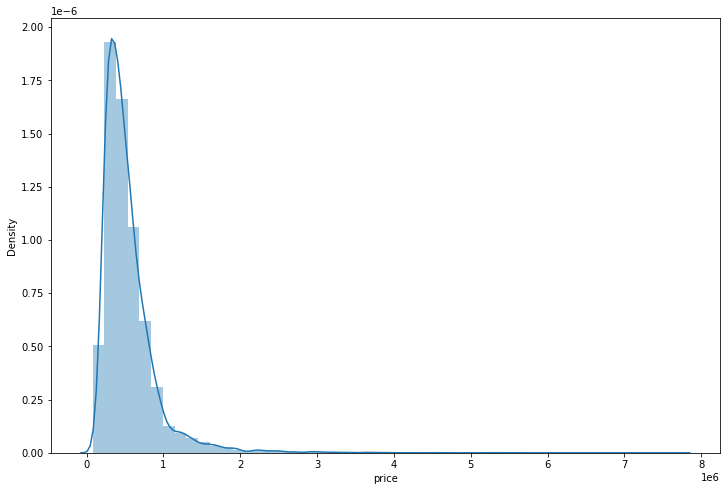

In [12]:
plt.figure(figsize=(12,8))
sns.distplot(data2['price'])

C:\Users\fahmi\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sqft_living', ylabel='Density'>

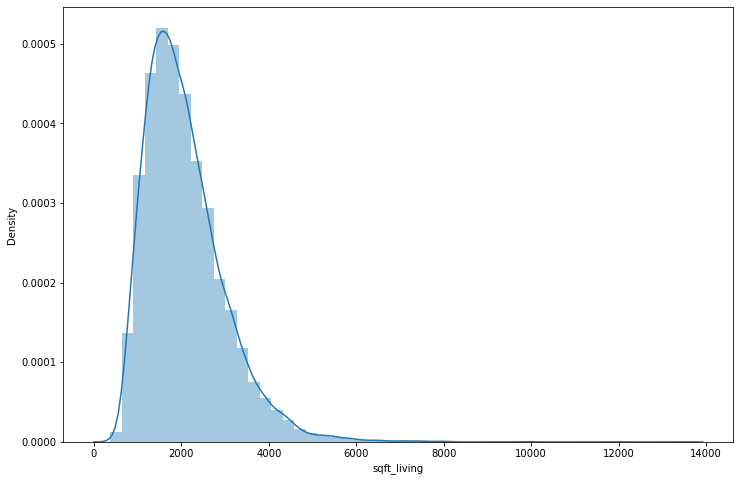

In [13]:
plt.figure(figsize=(12,8))
sns.distplot(data2['sqft_living'])

In [14]:
data2.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade'],
      dtype='object')

C:\Users\fahmi\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

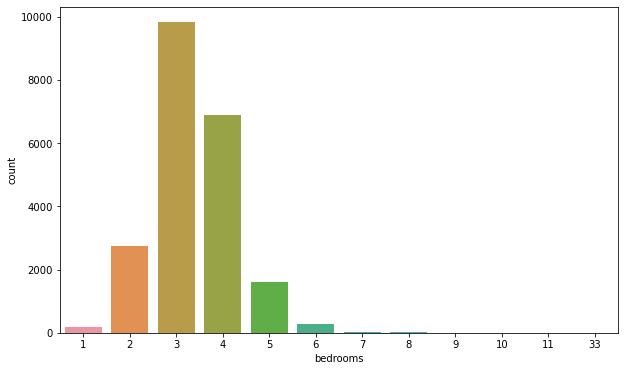

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(data2['bedrooms'])

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

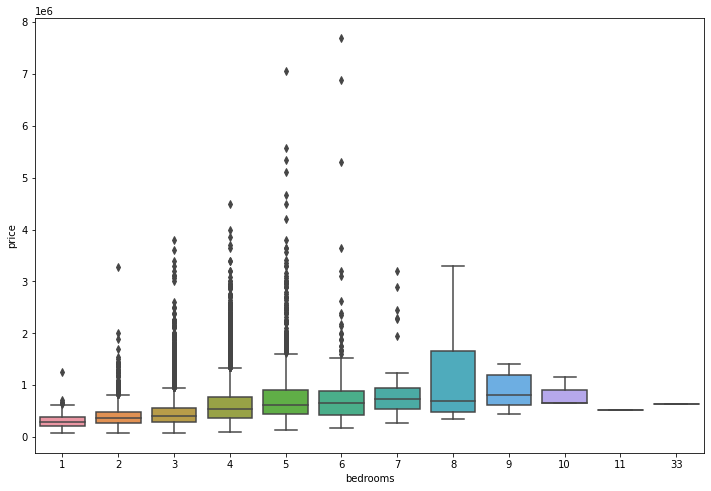

In [16]:
plt.figure(figsize=(12,8))
sns.boxplot(x='bedrooms' , y='price',data=data2)

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

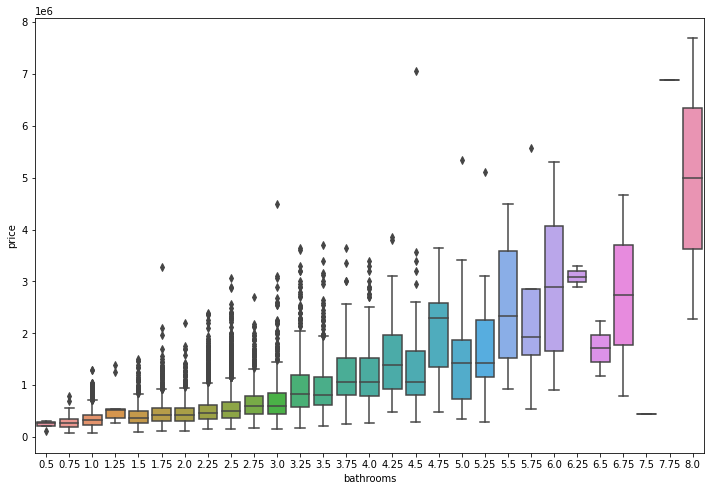

In [17]:
plt.figure(figsize=(12,8))
sns.boxplot(x='bathrooms' , y='price',data=data2)

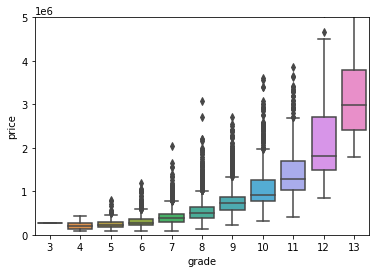

In [18]:
fig = sns.boxplot(x='grade',y='price',data=data2)
fig.axis(ymin=0,ymax=5000000);

In [19]:
data2.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade'],
      dtype='object')

In [20]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
 3   sqft_living  21597 non-null  int64  
 4   sqft_lot     21597 non-null  int64  
 5   floors       21597 non-null  float64
 6   condition    21597 non-null  int64  
 7   grade        21597 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 1.3 MB


<AxesSubplot:xlabel='floors', ylabel='count'>

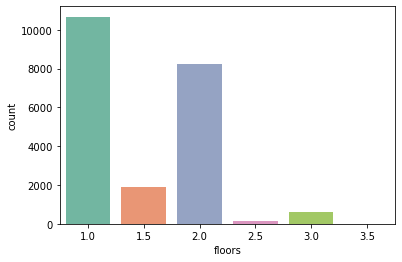

In [21]:
sns.countplot(x='floors', data=data2, palette='Set2')

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

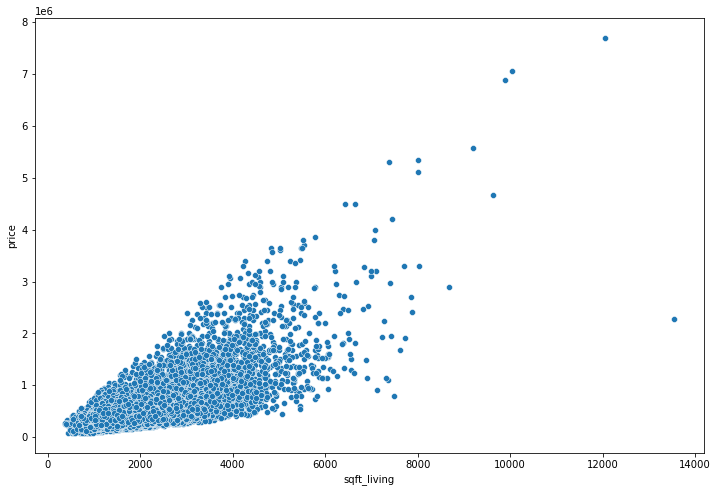

In [22]:
plt.figure(figsize =(12,8))
sns.scatterplot(x='sqft_living', y='price', data=data2)

<AxesSubplot:xlabel='sqft_lot', ylabel='price'>

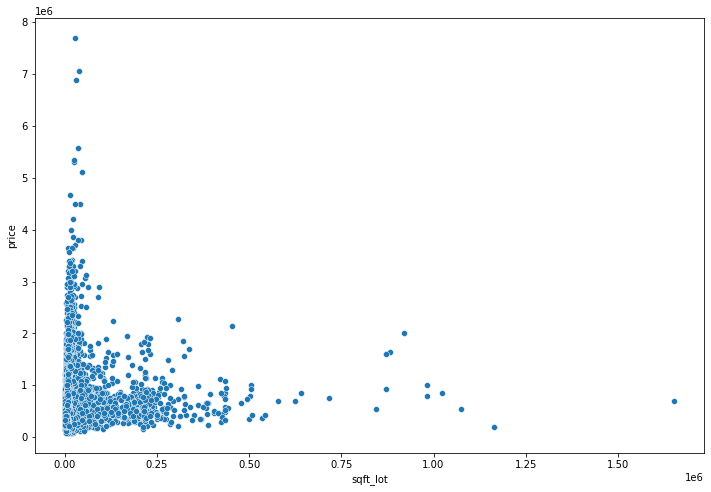

In [23]:
plt.figure(figsize =(12,8))
sns.scatterplot(x='sqft_lot', y='price', data=data2)

In [24]:
data2.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade'],
      dtype='object')

In [25]:
data2.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade
price,1,0.31,0.53,0.70,0.09,0.26,0.04,0.67
bedrooms,0.31,1,0.51,0.58,0.03,0.18,0.03,0.36
bathrooms,0.53,0.51,1,0.76,0.09,0.50,-0.13,0.67
sqft_living,0.70,0.58,0.76,1,0.17,0.35,-0.06,0.76
sqft_lot,0.09,0.03,0.09,0.17,1,-0.00,-0.01,0.11
floors,0.26,0.18,0.50,0.35,-0.00,1,-0.26,0.46
condition,0.04,0.03,-0.13,-0.06,-0.01,-0.26,1,-0.15
grade,0.67,0.36,0.67,0.76,0.11,0.46,-0.15,1


<function matplotlib.pyplot.show(close=None, block=None)>

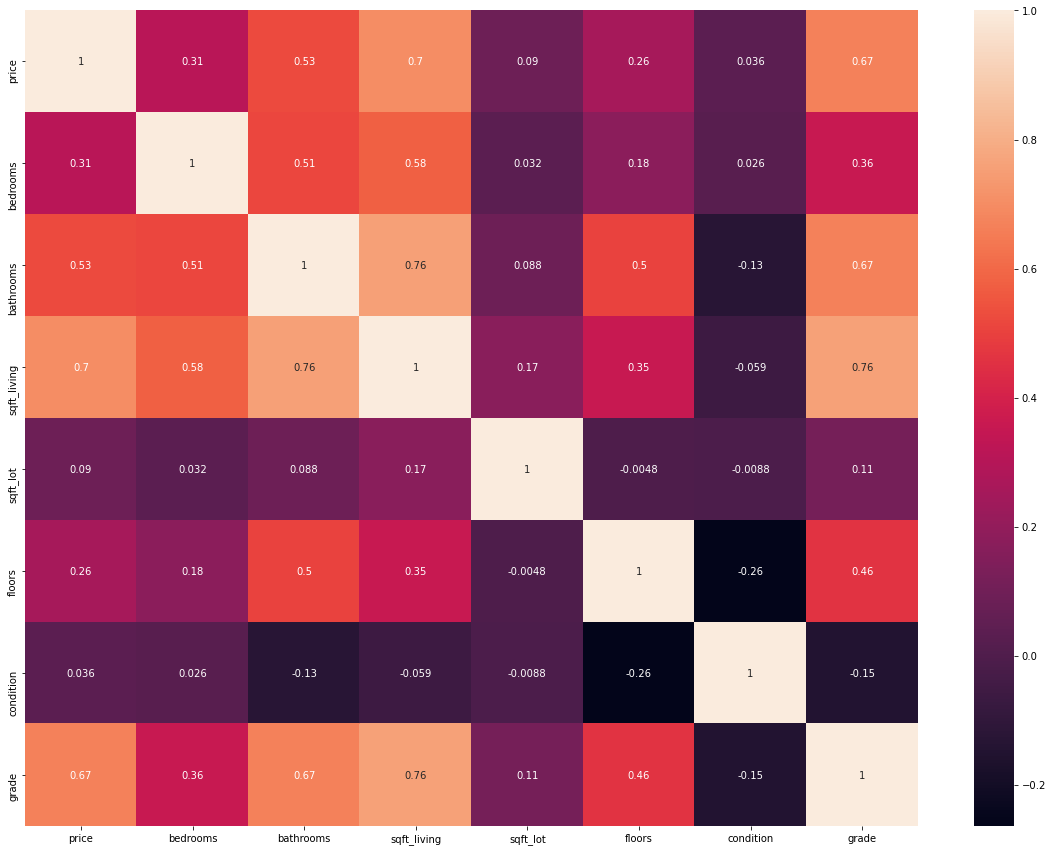

In [26]:
#visualize the corr between all features
cor=data2.corr()
plt.figure(figsize=(20,15))
sns.heatmap(cor,annot=True)
plt.show

In [27]:
data2.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade
count,21597,21597,21597,21597,21597,21597,21597,21597
mean,"540,296.57",3.37,2.12,"2,080.32","15,099.41",1.49,3.41,7.66
std,"367,368.14",0.93,0.77,918.11,"41,412.64",0.54,0.65,1.17
min,78000,1,0.50,370,520,1,1,3
25%,322000,3,1.75,1430,5040,1,3,7
50%,450000,3,2.25,1910,7618,1.50,3,7
75%,645000,4,2.50,2550,10685,2,4,8
max,7700000,33,8,13540,1651359,3.50,5,13


In [28]:
#identifying std/zscore
zscore = np.abs(stats.zscore(data2))
zscore 

array([[0.86671627, 0.40290302, 1.45107268, ..., 0.91555234, 0.62998644,
        0.56080027],
       [0.00625157, 0.40290302, 0.17448579, ..., 0.93743087, 0.62998644,
        0.56080027],
       [0.98077344, 1.48249316, 1.45107268, ..., 0.91555234, 0.62998644,
        1.41318983],
       ...,
       [0.37618606, 1.48249316, 1.77618438, ..., 0.93743087, 0.62998644,
        0.56080027],
       [0.38190525, 0.40290302, 0.49959749, ..., 0.93743087, 0.62998644,
        0.2915893 ],
       [0.58606486, 1.48249316, 1.77618438, ..., 0.93743087, 0.62998644,
        0.56080027]])

In [29]:
#removing outlier as outlier boundaries from the mean is std=3
data3 = data2[(zscore < 3).all(axis=1)]
data3

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade
0,221900,3,1,1180,5650,1,3,7
1,538000,3,2.25,2570,7242,2,3,7
2,180000,2,1,770,10000,1,3,6
3,604000,4,3,1960,5000,1,5,7
4,510000,3,2,1680,8080,1,3,8
...,...,...,...,...,...,...,...,...
21592,360000,3,2.50,1530,1131,3,3,8
21593,400000,4,2.50,2310,5813,2,3,8
21594,402101,2,0.75,1020,1350,2,3,7
21595,400000,3,2.50,1600,2388,2,3,8


## 2nd attempt after removing outlier


C:\Users\fahmi\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

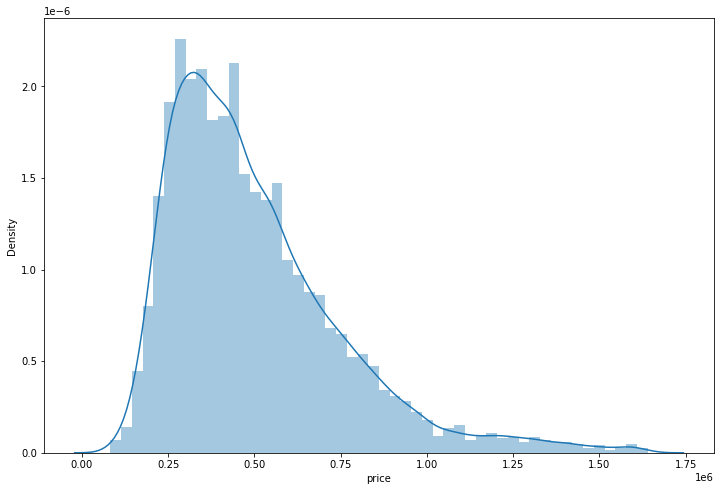

In [30]:
#after removing outlier
plt.figure(figsize=(12,8))
sns.distplot(data3['price'])

C:\Users\fahmi\anaconda3\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sqft_living', ylabel='Density'>

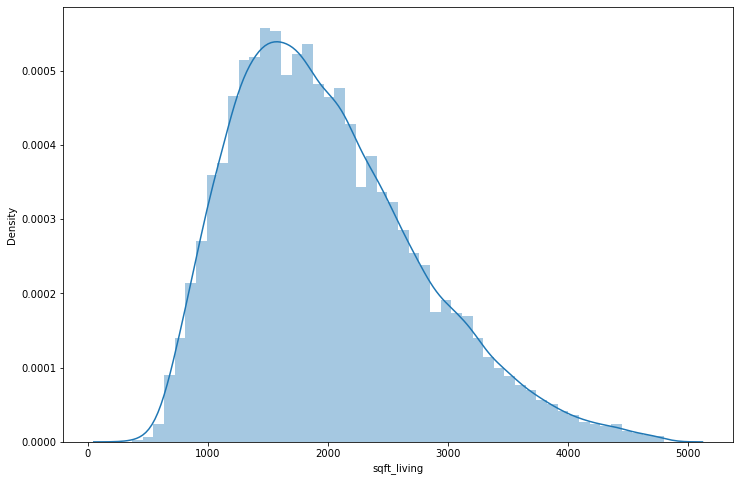

In [31]:
plt.figure(figsize=(12,8))
sns.distplot(data3['sqft_living'])

C:\Users\fahmi\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

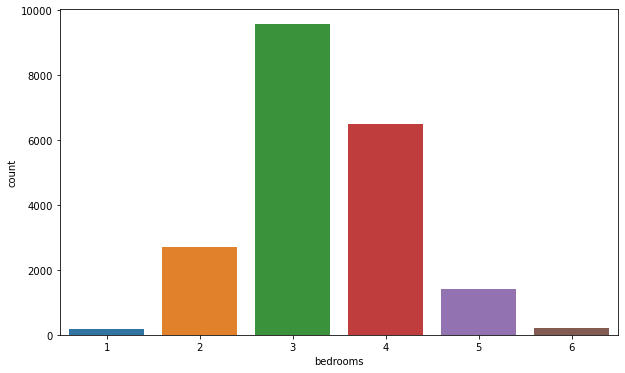

In [32]:
plt.figure(figsize=(10,6))
sns.countplot(data3['bedrooms'])

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

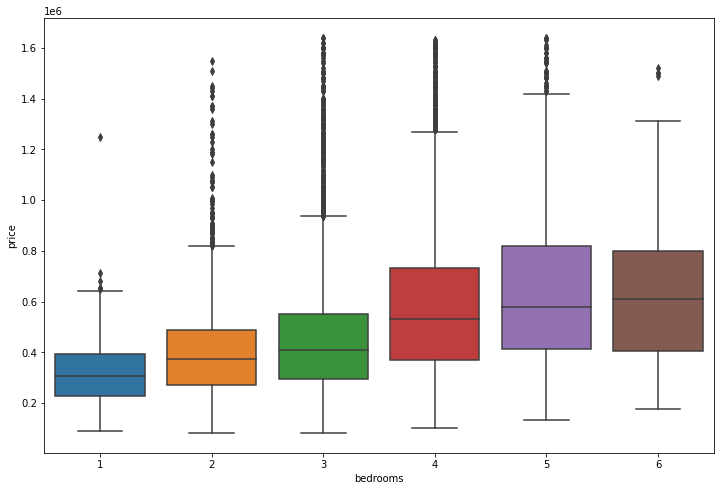

In [33]:
plt.figure(figsize=(12,8))
sns.boxplot(x='bedrooms' , y='price',data=data3)

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

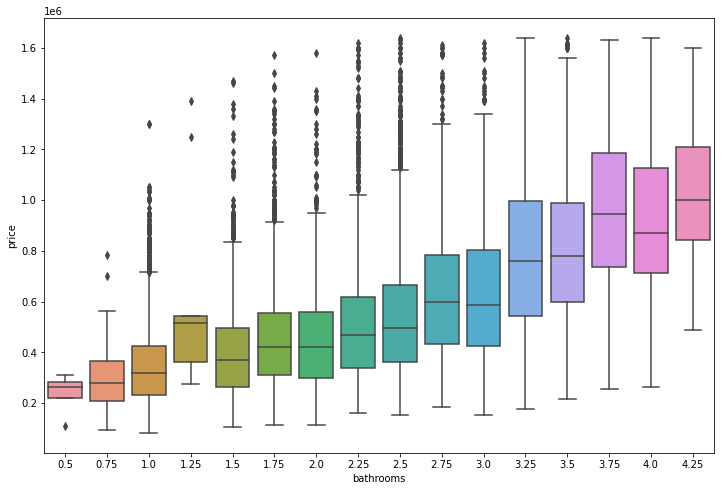

In [34]:
plt.figure(figsize=(12,8))
sns.boxplot(x='bathrooms' , y='price',data=data3)

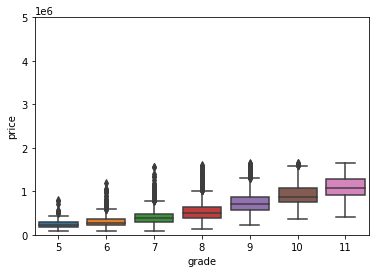

In [35]:
fig = sns.boxplot(x='grade',y='price',data=data3)
fig.axis(ymin=0,ymax=5000000);

<AxesSubplot:xlabel='floors', ylabel='count'>

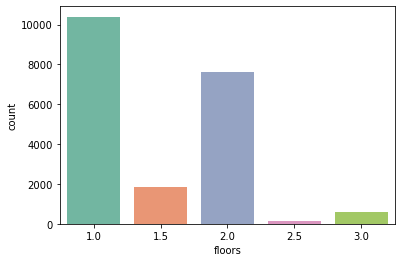

In [36]:
sns.countplot(x='floors', data=data3, palette='Set2')

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

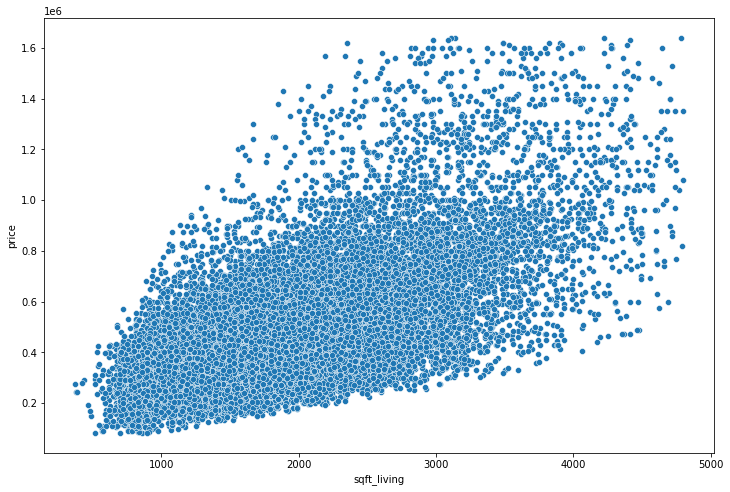

In [37]:
plt.figure(figsize =(12,8))
sns.scatterplot(x='sqft_living', y='price', data=data3)

<AxesSubplot:xlabel='sqft_lot', ylabel='price'>

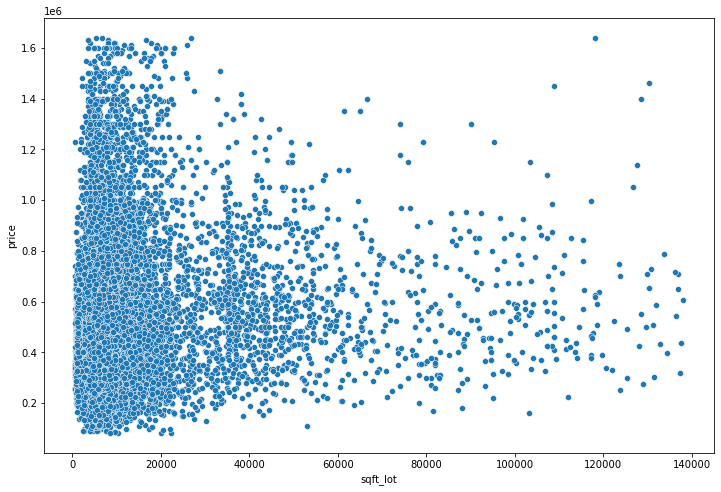

In [38]:
plt.figure(figsize =(12,8))
sns.scatterplot(x='sqft_lot', y='price', data=data3)

In [39]:
data3.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade
price,1,0.31,0.47,0.64,0.10,0.27,0.05,0.65
bedrooms,0.31,1,0.50,0.60,0.09,0.16,0.02,0.34
bathrooms,0.47,0.50,1,0.72,0.07,0.51,-0.14,0.63
sqft_living,0.64,0.60,0.72,1,0.23,0.34,-0.07,0.72
sqft_lot,0.10,0.09,0.07,0.23,1,-0.09,0.03,0.14
floors,0.27,0.16,0.51,0.34,-0.09,1,-0.28,0.46
condition,0.05,0.02,-0.14,-0.07,0.03,-0.28,1,-0.17
grade,0.65,0.34,0.63,0.72,0.14,0.46,-0.17,1


<function matplotlib.pyplot.show(close=None, block=None)>

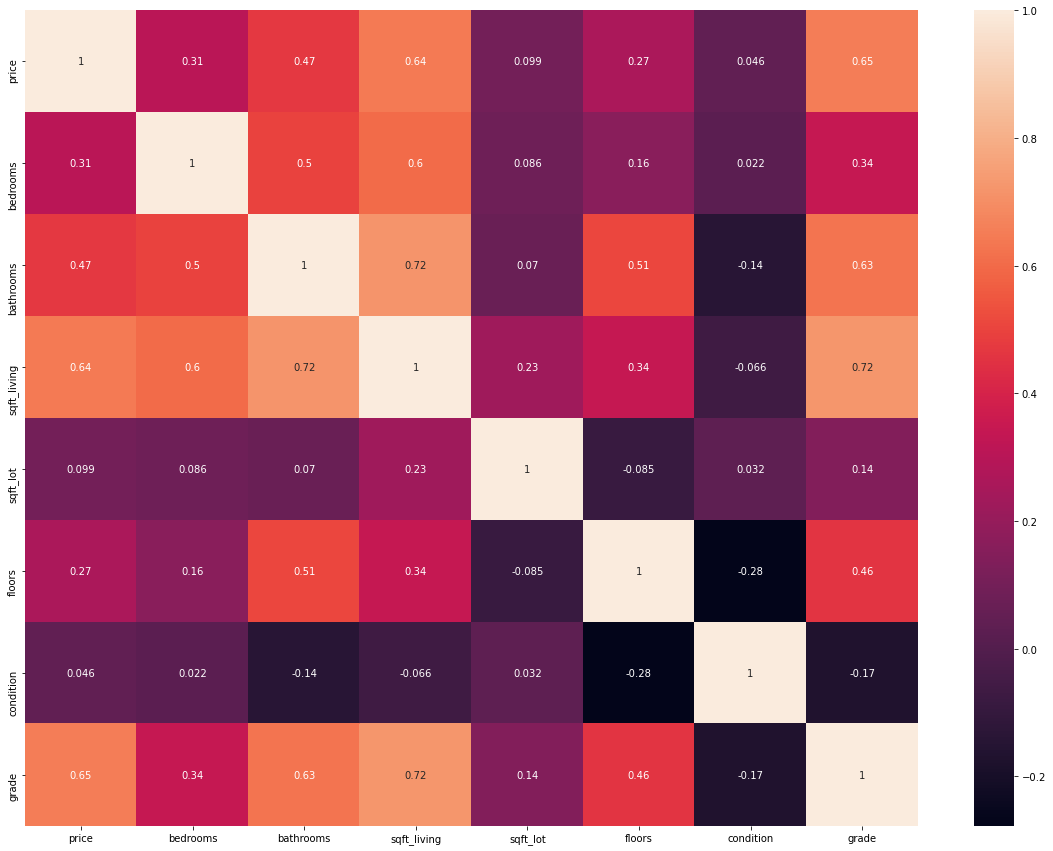

In [40]:
cor=data3.corr()
plt.figure(figsize=(20,15))
sns.heatmap(cor,annot=True)
plt.show

In [41]:
data3.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade
count,20557,20557,20557,20557,20557,20557,20557,20557
mean,"499,864.61",3.34,2.06,"1,995.65","10,656.21",1.48,3.42,7.58
std,"251,442.62",0.86,0.70,777.55,"13,514.89",0.54,0.64,1.06
min,82000,1,0.50,370,520,1,2,5
25%,317625,3,1.50,1410,5000,1,3,7
50%,441750,3,2.25,1870,7490,1,3,7
75%,620000,4,2.50,2470,10186,2,4,8
max,1640000,6,4.25,4800,138085,3,5,11


In [42]:
#making the bathrooms dataset easy to access  
data3.loc[data3['bathrooms'] <= 1,'bathrooms'] = 1
data3.loc[(data3['bathrooms'] > 1) & (data3['bathrooms'] <= 2),'bathrooms'] = 2
data3.loc[(data3['bathrooms'] > 2) & (data3['bathrooms'] <= 3),'bathrooms'] = 3
data3.loc[(data3['bathrooms'] > 3) & (data3['bathrooms'] <= 4),'bathrooms'] = 4
data3.loc[(data3['bathrooms'] > 4) & (data3['bathrooms'] <= 5),'bathrooms'] = 5

C:\Users\fahmi\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\fahmi\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\fahmi\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

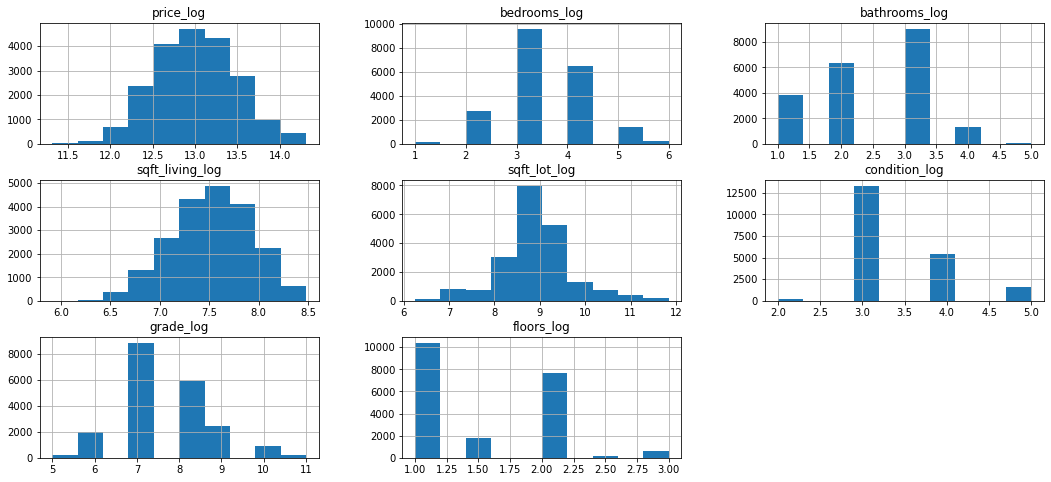

In [43]:
#transform data to near normal distribution for easy intepretation
data_log = pd.DataFrame([])
   
data_log['price_log'] = np.log(data3['price'])
data_log['bedrooms_log'] = (data3['bedrooms'])
data_log['bathrooms_log'] = (data3['bathrooms'])
data_log['sqft_living_log'] = np.log(data3['sqft_living'])
data_log['sqft_lot_log'] = np.log(data3['sqft_lot'])
data_log['condition_log'] = (data3['condition'])
data_log['grade_log'] = (data3['grade'])
data_log['floors_log'] = (data3['floors'])
data_log.hist(figsize  = [18,8]);


In [44]:
data_log['bathrooms_log'] = data_log['bathrooms_log'].astype('Int64')

In [45]:
#making sure all data is occupied
data_log = pd.get_dummies(data_log, columns=['bedrooms_log', 'bathrooms_log', 'condition_log','grade_log'])
data_log.columns

Index(['price_log', 'sqft_living_log', 'sqft_lot_log', 'floors_log',
       'bedrooms_log_1', 'bedrooms_log_2', 'bedrooms_log_3', 'bedrooms_log_4',
       'bedrooms_log_5', 'bedrooms_log_6', 'bathrooms_log_1',
       'bathrooms_log_2', 'bathrooms_log_3', 'bathrooms_log_4',
       'bathrooms_log_5', 'condition_log_2', 'condition_log_3',
       'condition_log_4', 'condition_log_5', 'grade_log_5', 'grade_log_6',
       'grade_log_7', 'grade_log_8', 'grade_log_9', 'grade_log_10',
       'grade_log_11'],
      dtype='object')

In [46]:
data_log.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20557 entries, 0 to 21596
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price_log        20557 non-null  float64
 1   sqft_living_log  20557 non-null  float64
 2   sqft_lot_log     20557 non-null  float64
 3   floors_log       20557 non-null  float64
 4   bedrooms_log_1   20557 non-null  uint8  
 5   bedrooms_log_2   20557 non-null  uint8  
 6   bedrooms_log_3   20557 non-null  uint8  
 7   bedrooms_log_4   20557 non-null  uint8  
 8   bedrooms_log_5   20557 non-null  uint8  
 9   bedrooms_log_6   20557 non-null  uint8  
 10  bathrooms_log_1  20557 non-null  uint8  
 11  bathrooms_log_2  20557 non-null  uint8  
 12  bathrooms_log_3  20557 non-null  uint8  
 13  bathrooms_log_4  20557 non-null  uint8  
 14  bathrooms_log_5  20557 non-null  uint8  
 15  condition_log_2  20557 non-null  uint8  
 16  condition_log_3  20557 non-null  uint8  
 17  condition_lo

In [47]:
y_result='price_log'
x_features = ['sqft_living_log', 'sqft_lot_log', 'floors_log',
       'bedrooms_log_1', 'bedrooms_log_2', 'bedrooms_log_3', 'bedrooms_log_4',
       'bedrooms_log_5', 'bedrooms_log_6', 'bathrooms_log_1',
       'bathrooms_log_2', 'bathrooms_log_3', 'bathrooms_log_4',
       'bathrooms_log_5', 'condition_log_2', 'condition_log_3',
       'condition_log_4', 'condition_log_5', 'grade_log_5', 'grade_log_6',
       'grade_log_7', 'grade_log_8', 'grade_log_9', 'grade_log_10',
       'grade_log_11']

x_features='+'.join(x_features)
formula=y_result + '~' + x_features
model=ols(formula=formula, data=data_log).fit()

In [48]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     1084.
Date:                Sun, 30 Oct 2022   Prob (F-statistic):               0.00
Time:                        15:49:06   Log-Likelihood:                -6276.5
No. Observations:               20557   AIC:                         1.260e+04
Df Residuals:                   20535   BIC:                         1.277e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        3.337e+10   3.08e+10      1.085      0.278   -2.69e+10    9.37e+10
sqft_living_log     0.5751      0.012     48.805      0.000       0.552       0.598
sqft_lot_log       -0.0763      0.004    -21.307      0.000      -0.083      -0.069
floors_log         -0.0209      0.006     -3.537      0.000      -0.032      -0.009
bedrooms_log_1  -1.361e+10   1.25e+10     -1.085      0.278   -3.82e+10     1.1e+10
bedrooms_log_2  -1.361e+10   1.25e+10     -1.085      0.278   -3.82e+10     1.1e+10
bedrooms_log_3  -1.361e+10   1.25e+10     -1.085      0.278   -3.82e+10     1.1e+10
bedrooms_log_4  -1.361e+10   1.25e+10     -1.085      0.278   -3.82e+10     1.1e+10
bedrooms_log_5  -1.361e+10   1.25e+10     -1.085      0.278   -3.82e+10     1.1e+10
bedrooms_log_6  -1.361e+10   1.25e+10     -1.085      0.278   -3.82e+10     1.1e+10
bathrooms_log_1 -1.682e+10   1.55e+10     -1.085      0.278   -4.72e+10    1.36e+10
bathrooms_log_2 -1.682e+10   1.55e+10     -1.085      0.278   -4.72e+10    1.36e+10
bathrooms_log_3 -1.682e+10   1.55e+10     -1.085      0.278   -4.72e+10    1.36e+10
bathrooms_log_4 -1.682e+10   1.55e+10     -1.085      0.278   -4.72e+10    1.36e+10
bathrooms_log_5 -1.682e+10   1.55e+10     -1.085      0.278   -4.72e+10    1.36e+10
condition_log_2  7.733e+09   7.13e+09      1.085      0.278   -6.24e+09    2.17e+10
condition_log_3  7.733e+09   7.13e+09      1.085      0.278   -6.24e+09    2.17e+10
condition_log_4  7.733e+09   7.13e+09      1.085      0.278   -6.24e+09    2.17e+10
condition_log_5  7.733e+09   7.13e+09      1.085      0.278   -6.24e+09    2.17e+10
grade_log_5     -1.068e+10   9.85e+09     -1.085      0.278      -3e+10    8.62e+09
grade_log_6     -1.068e+10   9.85e+09     -1.085      0.278      -3e+10    8.62e+09
grade_log_7     -1.068e+10   9.85e+09     -1.085      0.278      -3e+10    8.62e+09
grade_log_8     -1.068e+10   9.85e+09     -1.085      0.278      -3e+10    8.62e+09
grade_log_9     -1.068e+10   9.85e+09     -1.085      0.278      -3e+10    8.62e+09
grade_log_10    -1.068e+10   9.85e+09     -1.085      0.278      -3e+10    8.62e+09
grade_log_11    -1.068e+10   9.85e+09     -1.085      0.278      -3e+10    8.62e+09
==============================================================================
Omnibus:                        0.240   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.887   Jarque-Bera (JB):                0.219
Skew:                          -0.000   Prob(JB):                        0.896
Kurtosis:                       3.016   Cond. No.                     1.35e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.58e-26. This might indicate that there a

In [49]:
x_features

'sqft_living_log+sqft_lot_log+floors_log+bedrooms_log_1+bedrooms_log_2+bedrooms_log_3+bedrooms_log_4+bedrooms_log_5+bedrooms_log_6+bathrooms_log_1+bathrooms_log_2+bathrooms_log_3+bathrooms_log_4+bathrooms_log_5+condition_log_2+condition_log_3+condition_log_4+condition_log_5+grade_log_5+grade_log_6+grade_log_7+grade_log_8+grade_log_9+grade_log_10+grade_log_11'

In [50]:
formula

'price_log~sqft_living_log+sqft_lot_log+floors_log+bedrooms_log_1+bedrooms_log_2+bedrooms_log_3+bedrooms_log_4+bedrooms_log_5+bedrooms_log_6+bathrooms_log_1+bathrooms_log_2+bathrooms_log_3+bathrooms_log_4+bathrooms_log_5+condition_log_2+condition_log_3+condition_log_4+condition_log_5+grade_log_5+grade_log_6+grade_log_7+grade_log_8+grade_log_9+grade_log_10+grade_log_11'

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X= data_log.drop('price_log', axis=1)
y = data_log['price_log']

In [53]:
len(y)

20557

In [54]:
##spliting datas for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [55]:
X_train

,sqft_living_log,sqft_lot_log,floors_log,bedrooms_log_1,bedrooms_log_2,bedrooms_log_3,bedrooms_log_4,bedrooms_log_5,bedrooms_log_6,bathrooms_log_1,...,condition_log_3,condition_log_4,condition_log_5,grade_log_5,grade_log_6,grade_log_7,grade_log_8,grade_log_9,grade_log_10,grade_log_11
13514,7.94,9.83,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
992,7.31,8.94,1,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
21454,6.94,10.12,1,0,0,1,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0
7719,7.89,8.54,2,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
14964,7.71,11.02,2,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11823,7.65,8.24,2,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
12539,6.67,7.88,1,0,1,0,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
5658,7.61,8.96,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
901,8.25,9.52,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [56]:
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score


In [57]:
#apply and modeling the train test set
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

#identifying the residuals
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)

Train Mean Squared Error: 0.10754234456435001
Test Mean Squared Error: 0.10870464439057256


In [58]:
#performing cv test and comparing with train and test MSE
mse = make_scorer(mean_squared_error)
cv_10_results = cross_val_score(linreg, X, y, cv=10, scoring=mse)
cv_10_results.mean()

0.10833089333286676

In [59]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     1084.
Date:                Sun, 30 Oct 2022   Prob (F-statistic):               0.00
Time:                        15:49:24   Log-Likelihood:                -6276.5
No. Observations:               20557   AIC:                         1.260e+04
Df Residuals:                   20535   BIC:                         1.277e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        3.337e+10   3.08e+10      1.085      0.278   -2.69e+10    9.37e+10
sqft_living_log     0.5751      0.012     48.805      0.000       0.552       0.598
sqft_lot_log       -0.0763      0.004    -21.307      0.000      -0.083      -0.069
floors_log         -0.0209      0.006     -3.537      0.000      -0.032      -0.009
bedrooms_log_1  -1.361e+10   1.25e+10     -1.085      0.278   -3.82e+10     1.1e+10
bedrooms_log_2  -1.361e+10   1.25e+10     -1.085      0.278   -3.82e+10     1.1e+10
bedrooms_log_3  -1.361e+10   1.25e+10     -1.085      0.278   -3.82e+10     1.1e+10
bedrooms_log_4  -1.361e+10   1.25e+10     -1.085      0.278   -3.82e+10     1.1e+10
bedrooms_log_5  -1.361e+10   1.25e+10     -1.085      0.278   -3.82e+10     1.1e+10
bedrooms_log_6  -1.361e+10   1.25e+10     -1.085      0.278   -3.82e+10     1.1e+10
bathrooms_log_1 -1.682e+10   1.55e+10     -1.085      0.278   -4.72e+10    1.36e+10
bathrooms_log_2 -1.682e+10   1.55e+10     -1.085      0.278   -4.72e+10    1.36e+10
bathrooms_log_3 -1.682e+10   1.55e+10     -1.085      0.278   -4.72e+10    1.36e+10
bathrooms_log_4 -1.682e+10   1.55e+10     -1.085      0.278   -4.72e+10    1.36e+10
bathrooms_log_5 -1.682e+10   1.55e+10     -1.085      0.278   -4.72e+10    1.36e+10
condition_log_2  7.733e+09   7.13e+09      1.085      0.278   -6.24e+09    2.17e+10
condition_log_3  7.733e+09   7.13e+09      1.085      0.278   -6.24e+09    2.17e+10
condition_log_4  7.733e+09   7.13e+09      1.085      0.278   -6.24e+09    2.17e+10
condition_log_5  7.733e+09   7.13e+09      1.085      0.278   -6.24e+09    2.17e+10
grade_log_5     -1.068e+10   9.85e+09     -1.085      0.278      -3e+10    8.62e+09
grade_log_6     -1.068e+10   9.85e+09     -1.085      0.278      -3e+10    8.62e+09
grade_log_7     -1.068e+10   9.85e+09     -1.085      0.278      -3e+10    8.62e+09
grade_log_8     -1.068e+10   9.85e+09     -1.085      0.278      -3e+10    8.62e+09
grade_log_9     -1.068e+10   9.85e+09     -1.085      0.278      -3e+10    8.62e+09
grade_log_10    -1.068e+10   9.85e+09     -1.085      0.278      -3e+10    8.62e+09
grade_log_11    -1.068e+10   9.85e+09     -1.085      0.278      -3e+10    8.62e+09
==============================================================================
Omnibus:                        0.240   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.887   Jarque-Bera (JB):                0.219
Skew:                          -0.000   Prob(JB):                        0.896
Kurtosis:                       3.016   Cond. No.                     1.35e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.58e-26. This might indicate that there a